<a href="https://colab.research.google.com/github/Baldros/AnaliseRegressao-UFRJ/blob/main/Laborat%C3%B3rio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

Primeiro laboratório prático do curso de **análise de regressão** da Universidade Federal do Rio de Janeiro (UFRJ). Aqui vamos ver os primeiros passos para o ajuste de um modelo utilizando a função `lsfit`, uma opção válida para o caso de **modelos de regressão simples**, vamos ver alguns gráficos úteis para análisar a relação regressora resposta.

# Exemplo 1:

O dado abaixo fornece o número de membros e o número médio de torcedores em jogos do time de futebol Brisbane Lions (Austrália) de 1987 (primeiro ano que competiram) a 2003. Os dirigentes acreditam que há relação entre o número de sócios torcedores (membros) e a arrecadação em dias de jogos. Fonte: The Sunday
Mail newspaper (Brisbane), 15 de junho de 2003, página 119.

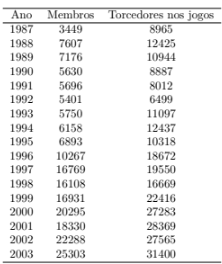


In [57]:
# Dados:
dt = matrix(c(1987, 3449, 8965, 1988, 7607, 12425, 1989, 7176, 10944, 1990,5630,
8887,1991, 5696, 8012, 1992, 5401, 6499, 1993, 5750, 11097, 1994,
6158, 12437,1995, 6893, 10318, 1996, 10267, 18672, 1997, 16769, 19550,
1998, 16108, 16669,1999, 16931, 22416, 2000, 20295, 27283, 2001, 18330,
28369, 2002, 22288, 27565,2003, 25303, 31400),17,3,byrow=T);dt

1987,3449,8965
1988,7607,12425
1989,7176,10944
1990,5630,8887
1991,5696,8012
1992,5401,6499
1993,5750,11097
1994,6158,12437
1995,6893,10318
1996,10267,18672
1997,16769,19550


`matrix`

A função `matrix` consegue criar esse vetor de duas dimensões, ou também podemos chamar de $\text{tensor}$ de $\text{2º Ordem}$.

In [58]:
# Separando elementos:
x <- dt[,2] # Segunda coluna da matriz;
y <- dt[,3] # Terceira colunada matriz.

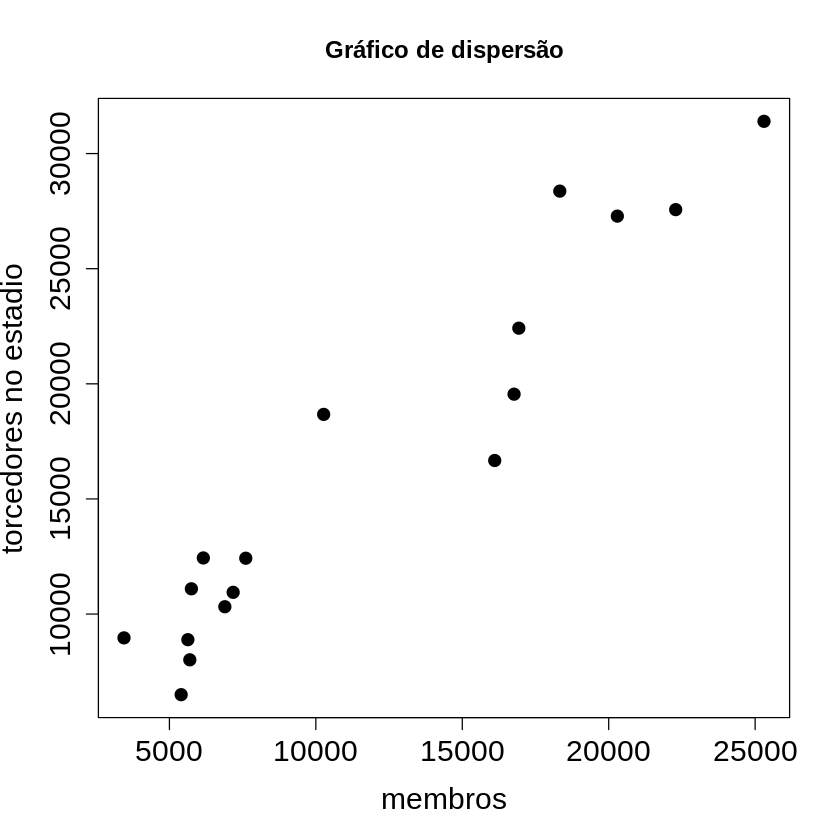

In [59]:
# Visualizando elementos:
plot(x,y,pch=20,cex=2,col=1,main='Gráfico de dispersão',xlab="membros",ylab="torcedores no estadio",cex.lab=1.5, cex.axis=1.5)

O gráfico de dispersão entre variáveis do nosso conjunto de dados é uma boa forma inicial de se avaliar a relação linear entre variáveis do nosso conjunto de dados. Num modelo de **Regressão Linear**, temos que garantir essa linearidade das relações para que haja o melhor ajuste do modelo.

## $(a)$ Encontre os mínimos quadrados.

Sabemos que o método dos mínimos quadrados se dá por,

$$\frac{\partial S(\beta)}{\partial(\beta_0,\beta_1)}\big{|}_{\beta_0,\beta_1}=\frac{\partial}{\partial(\beta_0,\beta_1)}\big{|}_{\beta_0,\beta_1} \left( y-\hat{\beta_0}-x\hat{\beta_1}\right)^2=0$$

De modo que temos no final,

$$\begin{align*}
\hat{\beta_0} &= \bar{y}-\bar{x}\hat{\beta_1} \\
\hat{\beta_1} &= \frac{\sum_{i=1}^ny_ix_i - \frac{(\sum_{i=1}^ny_i)}{n}}{\sum_{i=1}^nx_i^2 - \frac{(\sum_{i=1}^nx_i)^2}{n}} = \frac{\Sigma_{i=1}^n(x_i - \bar{x})(y_i-\bar{y})}{\Sigma_{i=1}^n(x_i - \bar{x})^2} = \frac{\text{S}_{xy}}{\text{S}_{xx}}
\end{align*}
$$



Para ajustar os mínimos quadrados, podemos usar a função `lsfit`, de modo que é um ajuste de modelo diferente da tradicional `ols` que veremos mais para frente.

A função `lsfit`:
* É uma função mais antiga e menos flexível;
* Realiza uma regressão linear simples;
* Não aceita fórmulas, apenas matrizes ou vetores de variáveis independentes (x) e dependentes (y);
* Não oferece muitas opções para diagnósticos e ajustes de modelos.

Mas para o nosso propósito aqui é útil o suficiente.

In [60]:
# Ajustando os mínimos quadrados:
modelo = lsfit(x,y);summary(modelo)

             Length Class  Mode   
coefficients  2     -none- numeric
residuals    17     -none- numeric
intercept     1     -none- logical
qr            6     qr     list   

In [61]:
# Checando coeficientes:
modelo$coef

Intercept           X 
3503.538867    1.109456

Note que ele dá a informação junto com os labels, mas conseguimos visualizarmos apenas os numeros se quisermos.

In [62]:
  print(modelo$coef[1])
print(modelo$coef[[1]])
print(class(modelo$coef))

Intercept 
 3503.539 
[1] 3503.539
[1] "numeric"


## $(b)$ Qual a interpretação de $\hat{\beta_0}$ e $\hat{\beta_1}$ neste exemplo?

Podemos entender o $\beta_0$, o *intercept*, é o valor médio da regressão caso não haja implementação de nenhuma regressora. Pode ser entendido como o simples primeiro momento teórico, a média simplemente.

Já o $\beta_1$ é o elemento linear que ajusta a relevância da regressora, a covariável que serve para explicar a resposta, de modo a garantir uma média melhor adequada do que a resposta média padrão.

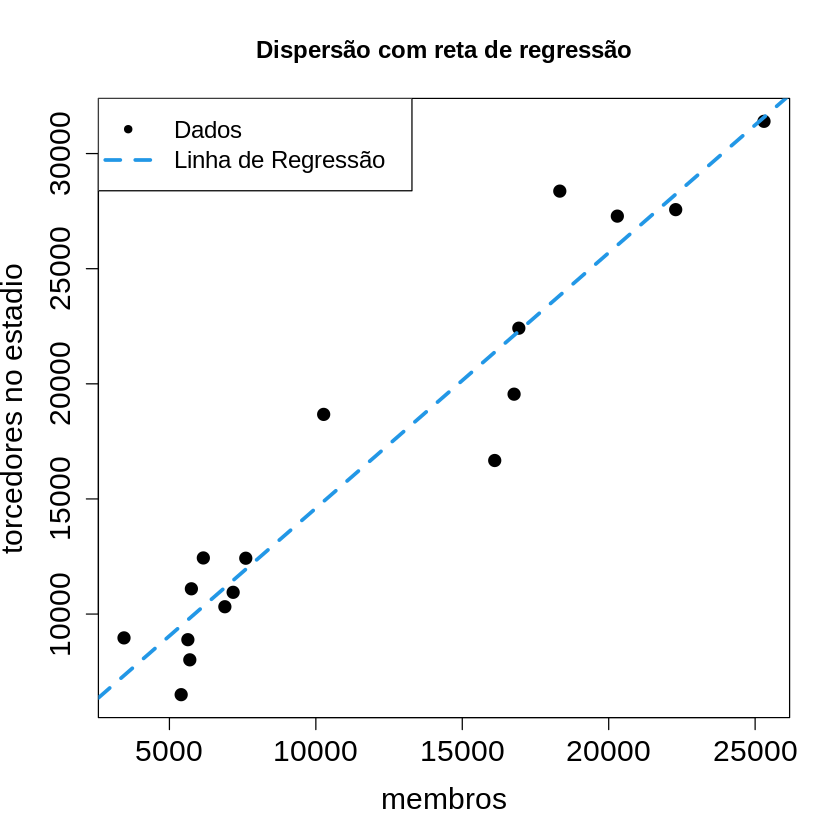

In [63]:
# Visualização:
plot(x,y,pch=20,cex=2,col=1,main='Dispersão com reta de regressão',xlab="membros",ylab="torcedores no estadio",cex.lab=1.5, cex.axis=1.5)
abline(modelo$coef,lwd=3,col=4,lty=2) # Reta de regressão

# Legenda
legend("topleft", legend=c("Dados", "Linha de Regressão"), col=c(1, 4), pch=c(20, NA), lty=c(NA, 2), lwd=c(NA, 3), cex=1.2)

## Predição com o Modelo:

Dado que o modelo está ajustado, podemos então pensar em realizar predições com os modelo. Vamos utilizar um valor que não fuja muito do domínio do nosso modelo, ou seja, um valor que não esteja muito distante do valor dos dados cuja o qual o modelo foi ajustado.

In [64]:
# Valor novo:
x0 <- as.numeric(readline(prompt = "Digite um valor para x0: ")) # Input padrão: 15000

# Validando adequação do valor ao dominio do modelo:
if (x0 > mean(x)-3*sd(x) &  x0 < mean(x)+3*sd(x)){
  print('Valor dentro do domínio do modelo')
} else{
  print('Valor fora do domínio do modelo.')
}

Digite um valor para x0: 15000
[1] "Valor dentro do domínio do modelo"


Existe toda uma tecnicalidade para validar se um determinado valor está realmente dentro ou não do modelo, levando em consideração a **hiperbole gerada pelo dominio** e a **distância que o ponto se encontra dos centroides dessa hiperbole**, todavia, como a ideia aqui não é tratar desse tema ainda, eu simplifiquei aqui.

In [65]:
# Gerando predição:
y0.hat= modelo$coef[[1]]+modelo$coef[[2]]*x0
sprintf('Para o valor x0 = %d temos um valor de predição y0.hat = %.2f',x0, y0.hat)

[1] "Para o valor x0 = 15000 temos um valor de predição y0.hat = 20145.38"

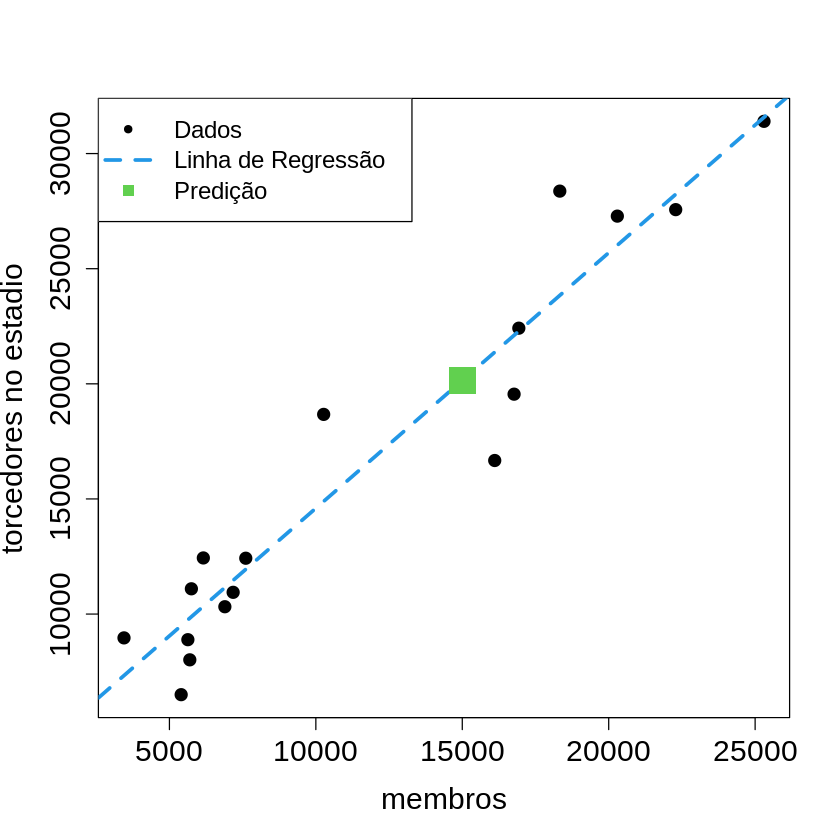

In [66]:
# Visualização:
plot(x,y,pch=20,cex=2,col=1,xlab="membros",ylab="torcedores no estadio",cex.lab=1.5, cex.axis=1.5) # Gráfico de dispersão
abline(modelo$coef,lwd=3,col=4,lty=2) # Reta de Regressão
points(x0,y0.hat,pch=15,col=3,cex=3) # Valor da predição
legend("topleft", legend=c("Dados", "Linha de Regressão","Predição"), col=c(1, 4, 3), pch=c(20, NA,15), lty=c(NA, 2), lwd=c(NA, 3), cex=1.2)

Note que de fato, o nosso valor de x0 está dentro do domínio do modelo. Tanto que a predição deu bem no meio do conjunto de dados. Note também que o valor da predição deu exatamente em cima da reta de regressão, por isso é ideal que o ajuste esteja bem feito. A reta de regressão tem esse nome, não é atoa, é nele que estão os valores preditos, então quanto pior o modelo, maior a distância a reta e os pontos do modelo, ou seja, pior a distância da predição de seus valores reais.

# Exemplo 2:

Em março de 1984 o jornal *Wall Street* publicou uma pesquisa na qual $4000$ adultos foram entrevistados.
Esses adultos eram consumidores do produto $A$ e foram perguntados se tinham visto um comercial do produto
$A$ na semana anterior. A variável resposta é o número de lembranças por semana e a covariável é o valor
gasto (em milhões de dolares) com propaganda para aquele produto.


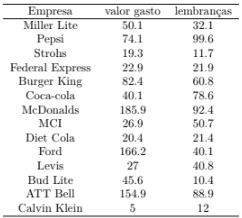

In [67]:
# Vetor de Empresas:
empresas <- c("MillerLite","Pepsi","Strohs","FederalExpress","BurgerKing",
"CocaCola","McDonalds","MCI","DietCola","Ford","Levis",
"BudLite","ATTBell","CalvinKlein")

# Matriz de Valores:
dt <- matrix(c(50.1, 32.1, 74.1, 99.6,19.3, 11.7,22.9, 21.9,82.4,
60.8, 40.1, 78.6,185.9, 92.4,26.9, 50.7,20.4, 21.4,166.2,
40.1, 27, 40.8,45.6, 10.4,154.9, 88.9, 5,12),14,2,byrow=T)

colnames(dt) = c("valor","lembranca") # Gerando das colunas
head(dt)

valor,lembranca
50.1,32.1
74.1,99.6
19.3,11.7
22.9,21.9
82.4,60.8
40.1,78.6


## $(a)$ Faça o scatterplot dos dados:

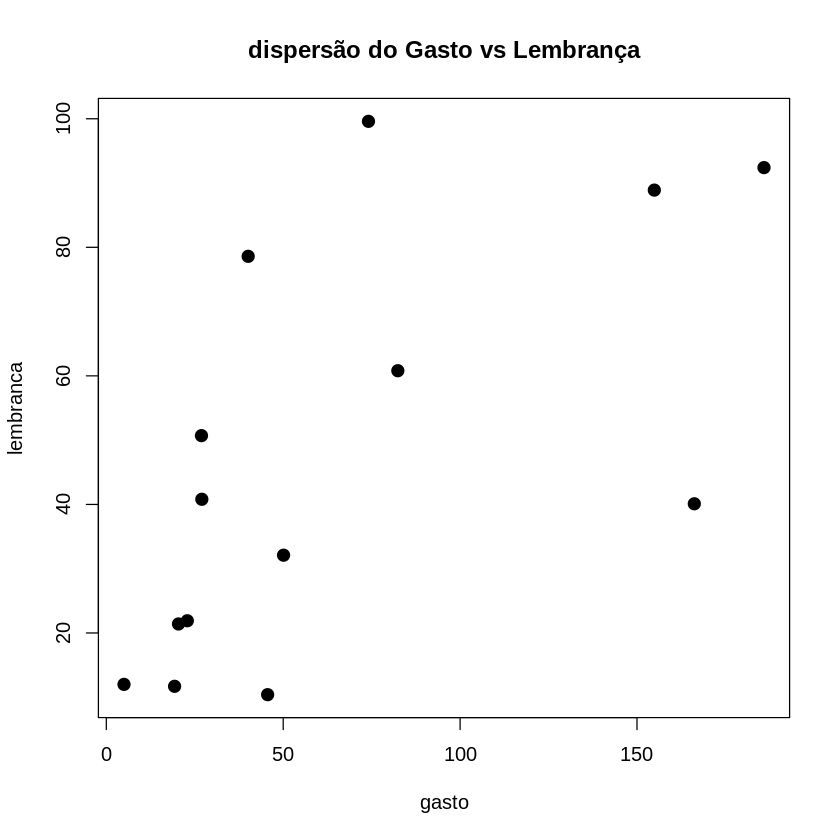

In [68]:
# Visualização:
plot(dt[,1],dt[,2],main='dispersão do Gasto vs Lembrança',xlab="gasto",ylab="lembranca",pch=20,cex=2)

In [69]:
# Extraindo vetores:
x = dt[,1]
y = dt[,2]

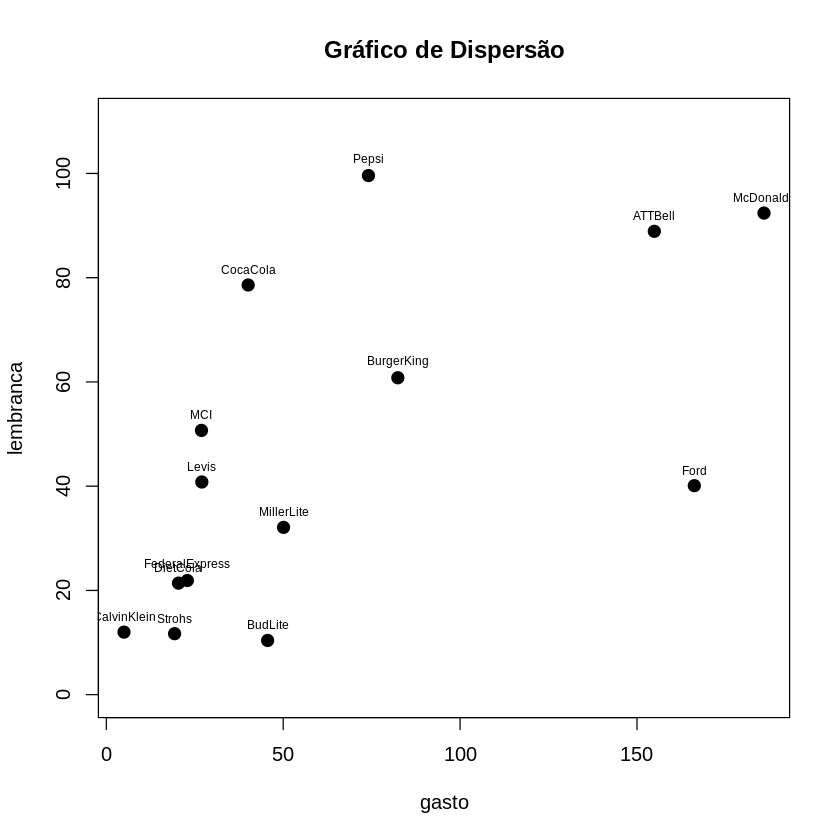

In [70]:
# Crie o gráfico com as dimensões ajustadas
plot(x, y, xlab = "gasto", main = 'Gráfico de Dispersão', ylab = "lembranca", pch = 20, cex = 2, ylim = c(0, 110))
text(x, y + 3, empresas, cex = 0.6) # Adicionando label nos pontos

## $(b)$ Ajuste o modelo de regressão simples para as variáveis:

Vimos como inferir os $\beta$'s, vamos que precisamos deles para ajustar adequadamente nosso modelo de regressão, que no caso simples, com apenas uma regressora, temos que,

**Modelo Teórico:**
$$y = \beta_0+x\beta_1+\epsilon$$

**Modelo Empírico:**
$$\hat{y}=\hat{\beta_0}+x\hat{\beta}_1$$

In [71]:
# Ajustando modelo de Regressão Simples:
modelo = lsfit(x,y)

# Coeficientes:
modelo$coef

Intercept          X 
25.6026014  0.3290221

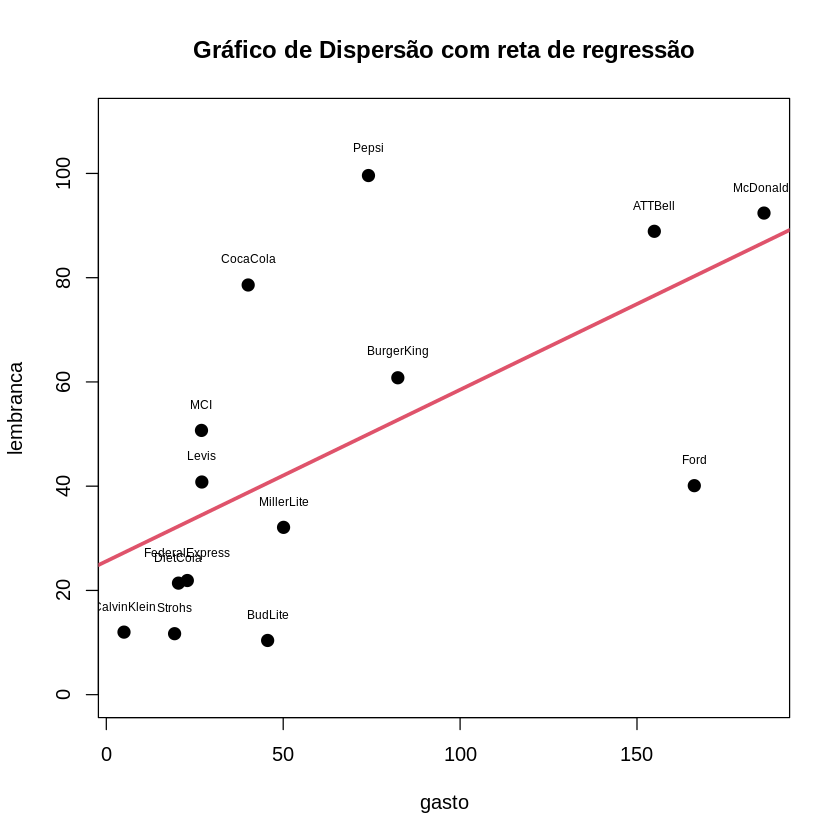

In [72]:
# Visualizando reta de regressão:
plot(x,y,xlab="gasto",main="Gráfico de Dispersão com reta de regressão",ylab="lembranca",pch=20,cex=2,ylim=c(0,110))
text(x,y+5,empresas,cex=0.6)
abline(modelo$coef,lwd=3,col=2)

No estudo de **pontos influentes** existem os **pontos de alavancagem**, pontos que alteram no ajuste do modelo. É fácil de notar plotando a reta de regressão, como fizemos acima. Aqui não vamos estudar profundamente os pontos de alavancagem, vamos apenas excluir o ponto considerado de alavancagem e ver as possíveis mudanças.

In [73]:
# Excluindo pontos de alavancagem:
x.novo=x[-c(2,6)]
y.novo=y[-c(2,6)]

# Ajustando modelo:
modelo.novo = lsfit(x.novo,y.novo)
modelo.novo$coef

Intercept         X 
17.075775  0.345017

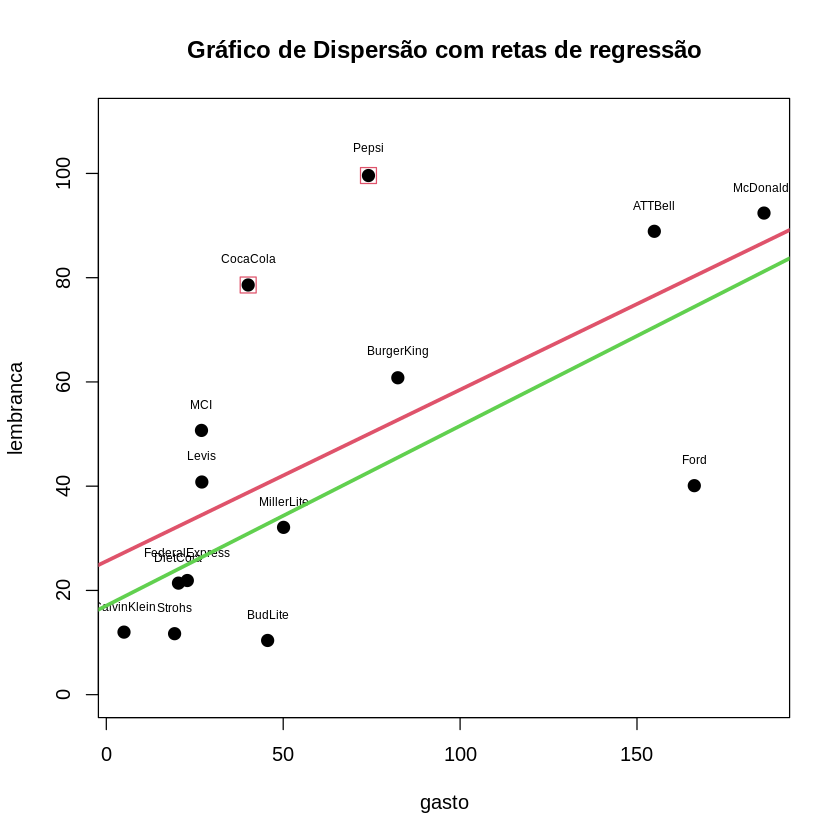

In [74]:
plot(x,y,xlab="gasto",main='Gráfico de Dispersão com retas de regressão',ylab="lembranca",pch=20,cex=2,ylim=c(0,110))
text(x,y+5,empresas,cex=0.6)
abline(modelo$coef,lwd=3,col=2)
abline(modelo.novo$coef,lwd=3,col=3)
points(x[c(2,6)],y[c(2,6)],pch=22,col=2,cex=2)

Valor Predito 26.35673

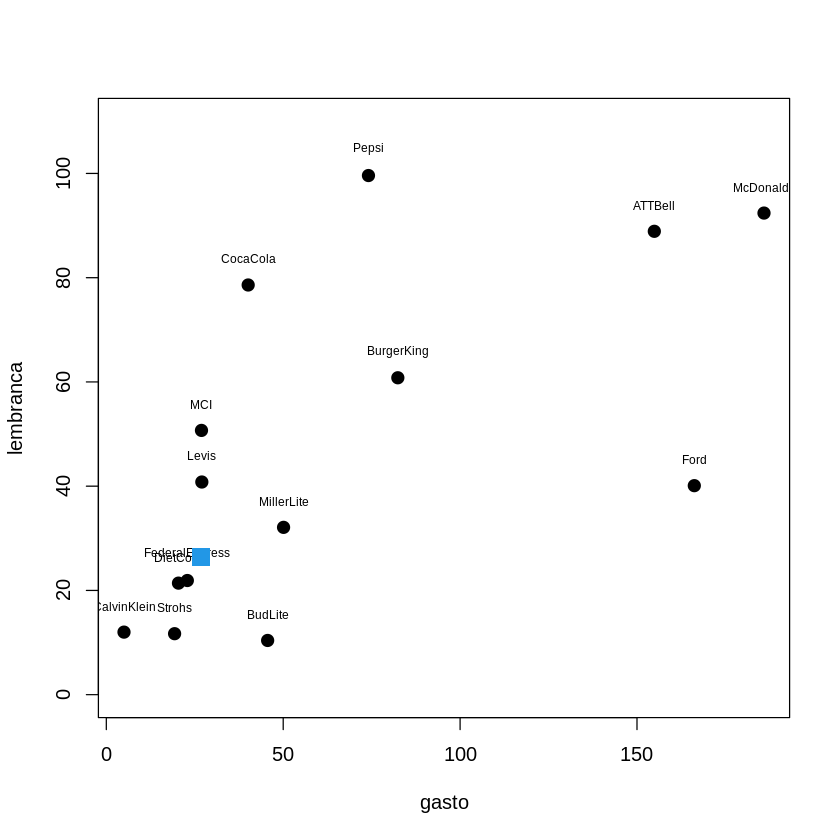

In [75]:
x0 = 26.9
y0.hat = 17.075775+(0.345017*x0)
plot(x,y,xlab="gasto",ylab="lembranca",pch=20,cex=2,ylim=c(0,110))
text(x,y+5,empresas,cex=0.6)
points(x0,y0.hat,pch=15,col=4,cex=2)
cat('Valor Predito', y0.hat)

# Exemplo 3

Um estudo sobre os níveis de ozônio na costa sul da Califórnia para os anos de 1980 a 1991 calculou o número
de dias que os níveis de ozônio passaram de 0.20ppm. O pesquisador acredita que o número de dias depende
de um índice meteorológico que é calculado fornecido a cada ano.

Dados:

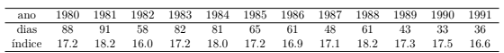

In [76]:
# Gerando vetor dos anos:
anos = 1980:1991

# vetores dos dados:
y = c(88,91,58,82,81,65,61,48,61,43,33,36)
x = c(17.2,18.2,16.0,17.2,18.0,17.2,16.9,17.1,18.2,17.3,17.5,16.6)

## $(a)$ Quais são as variáveis resposta e covariável? Faça o scatter plot dos dados;

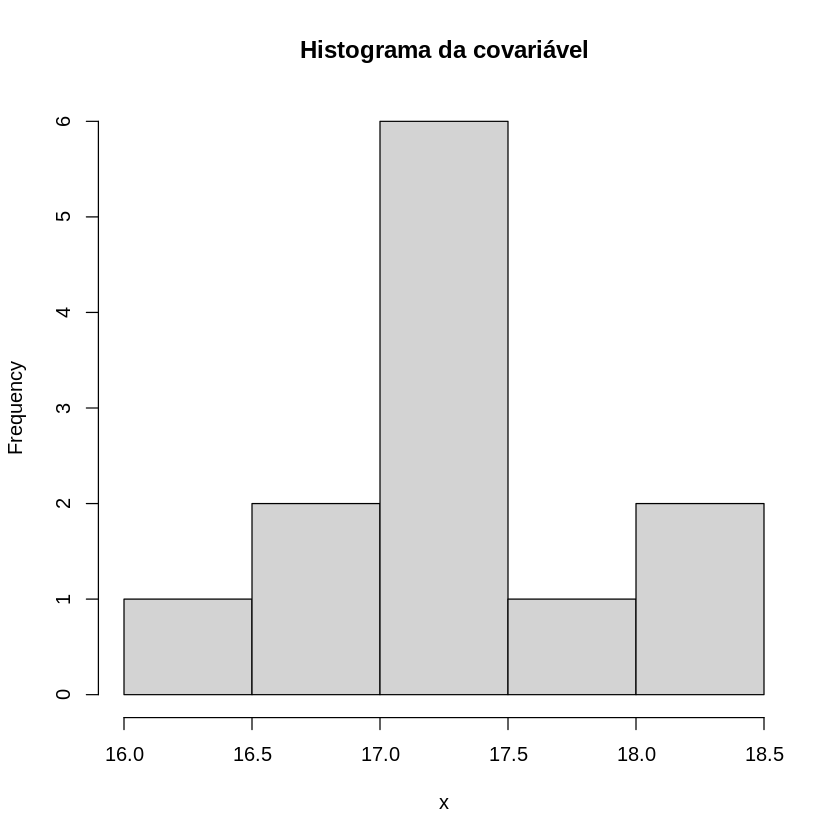

In [93]:
# Covariável:
hist(x, main='Histograma da covariável')

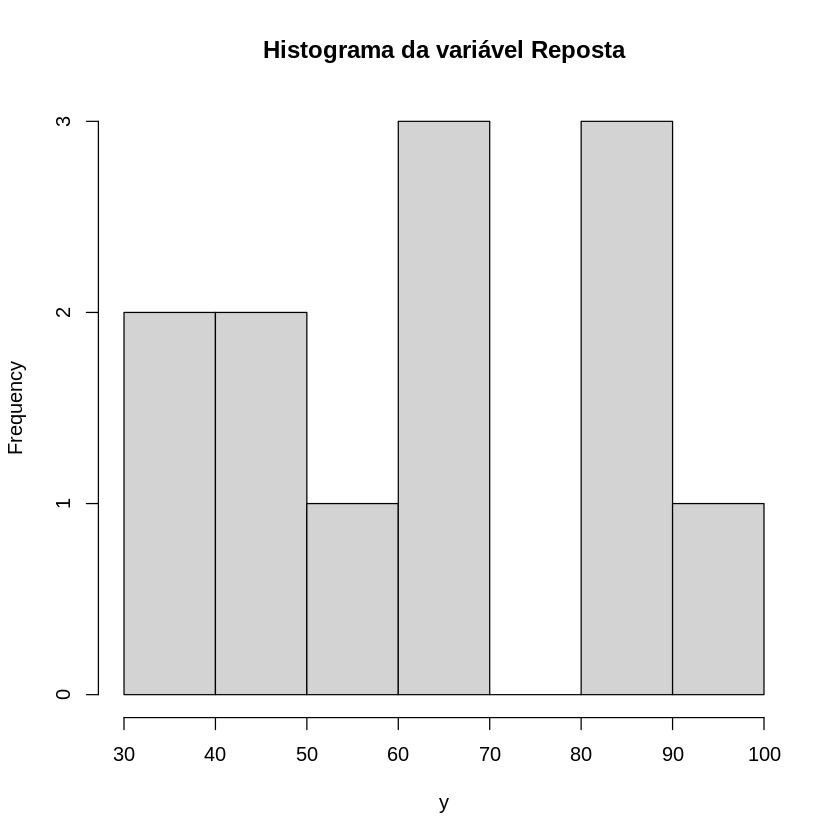

In [90]:
# Variável Resposta:
hist(y, main='Histograma da variável Reposta')

## $(b)$ Encontre os estimadores de mínimos quadrados para o modelo de regressão linear simples;

In [95]:
 # Ajustando o modelo:
 modelo = lsfit(x,y); modelo$coef

Intercept          X 
-144.27762   11.94952

## $(c)$ Construa o gráfico da reta ajustada de mínimos quadrados.

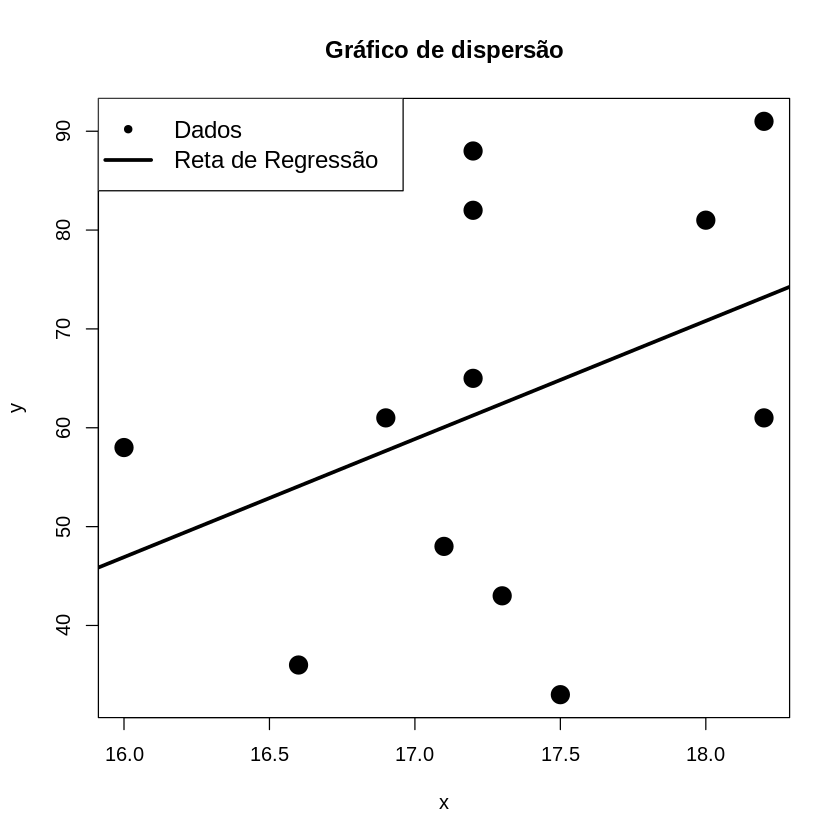

In [96]:
# Visualização dos dados:
plot(x,y,pch=20,main='Gráfico de dispersão',cex=3)
abline(modelo$coef,lwd=3)
legend("topleft", legend=c("Dados", "Reta de Regressão"), col=c(1, 1), pch=c(20, NA), lty=c(NA, 1), lwd=c(NA, 3), cex=1.2)

## $(d)$ Construa o gráfico do tempo versus os resíduos.

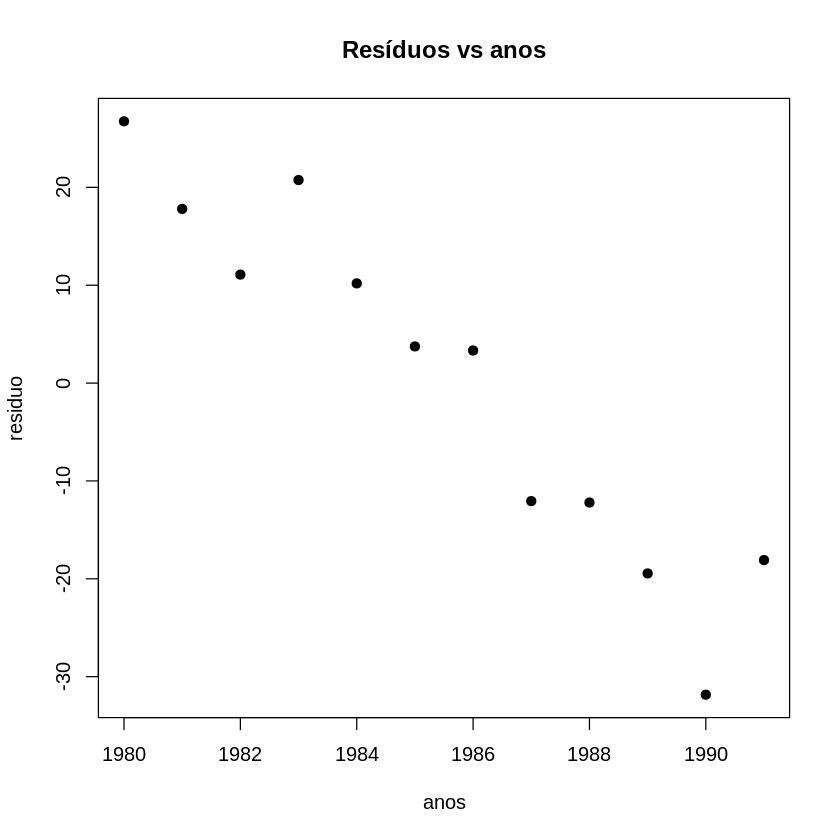

In [78]:
# Resíduos:
residuo=lsfit(x,y)$res;
plot(anos,residuo,pch=20,cex=1.5,main='Resíduos vs anos')

## $(e)$ Construa o gráfico do tempo versus a variável resposta.

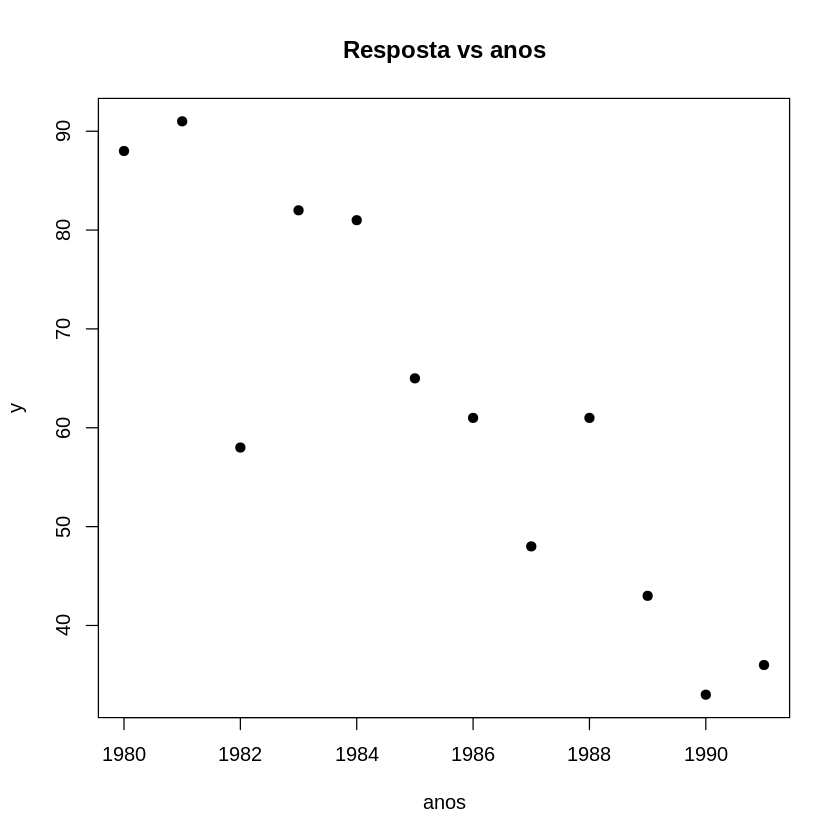

In [79]:
plot(anos,y,pch=20,cex=1.5,main='Resposta vs anos')